In [ ]:
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Without cross-validation

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
df1=pd.read_csv('data1.csv')
df2=pd.read_csv('data3.csv')
df1=df1[::-1]
df2=df2[::-1]

In [ ]:
df=pd.concat([df1,df2])

In [ ]:
# df=pd.read_csv('updated_currency_rates.csv')

In [ ]:
df=df.reset_index()

In [ ]:
df.drop(['index','Vol.'],axis=1,inplace=True)

In [ ]:
df.head()

,Date,Price,Open,High,Low,Change %
0,01/02/1990,16.80,16.80,16.80,16.80,-0.24%
1,01/03/1990,16.89,16.89,16.89,16.89,0.54%
2,01/04/1990,16.90,16.90,16.90,16.90,0.06%
3,01/05/1990,16.88,16.88,16.88,16.88,-0.12%
4,01/08/1990,16.88,16.88,16.88,16.88,0.00%


In [ ]:
df.tail()

,Date,Price,Open,High,Low,Change %
8689,05/15/2023,82.237,82.244,82.388,82.182,0.08%
8690,05/16/2023,82.264,82.239,82.317,82.160,0.03%
8691,05/17/2023,82.400,82.272,82.460,82.260,0.17%
8692,05/18/2023,82.720,82.453,82.797,82.348,0.39%
8693,05/19/2023,82.878,82.767,82.953,82.623,0.19%


In [ ]:
print(len(df))

8694


In [ ]:
df.rename(columns={'Date':'ds','Price':'y'},inplace=True)

In [ ]:
df.head()

,ds,y,Open,High,Low,Change %
0,01/02/1990,16.80,16.80,16.80,16.80,-0.24%
1,01/03/1990,16.89,16.89,16.89,16.89,0.54%
2,01/04/1990,16.90,16.90,16.90,16.90,0.06%
3,01/05/1990,16.88,16.88,16.88,16.88,-0.12%
4,01/08/1990,16.88,16.88,16.88,16.88,0.00%


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y,Open,High,Low,Change %
0,1990-01-02,16.80,16.80,16.80,16.80,-0.24%
1,1990-01-03,16.89,16.89,16.89,16.89,0.54%
2,1990-01-04,16.90,16.90,16.90,16.90,0.06%
3,1990-01-05,16.88,16.88,16.88,16.88,-0.12%
4,1990-01-08,16.88,16.88,16.88,16.88,0.00%


In [ ]:
# Split the data into train and test sets
# train_data, test_data = train_test_split(df, test_size=0.3, shuffle=False)
train_data = df[:-1100]
test_data = df[-1100:]


In [ ]:
model = Prophet(n_changepoints=8, changepoint_prior_scale=0.1)
model = model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a1_6b3z/yzjrcv_s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5a1_6b3z/tvwnf5yw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80', 'data', 'file=/tmp/tmp5a1_6b3z/yzjrcv_s.json', 'init=/tmp/tmp5a1_6b3z/tvwnf5yw.json', 'output', 'file=/tmp/tmp5a1_6b3z/prophet_model_d_pflao/prophet_model-20230521163553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:35:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions for train and test sets
train_predictions = model.predict(train_data)
test_predictions = model.predict(test_data)

In [ ]:
# Extract the actual values and predicted values for train and test sets
train_actual = train_data['y'].values
train_predicted = train_predictions['yhat'].values[:len(train_data)]
test_actual = test_data['y'].values
test_predicted = test_predictions['yhat'].values[-len(test_data):]

In [ ]:
print(test_actual)
print()
print(test_predicted)

[70.91  70.49  70.08  ... 82.4   82.72  82.878]

[70.54775977 70.56345416 70.55967058 ... 79.4058806  79.42380089
 79.42619205]


In [ ]:
future=model.make_future_dataframe(periods=50)

In [ ]:
forecast=model.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-02,14.889714,12.247143,17.605266
1,1990-01-03,14.894454,12.545055,17.479091
2,1990-01-04,14.903726,12.528593,17.266953
3,1990-01-05,14.896596,12.351332,17.666624
4,1990-01-08,14.932989,12.401625,17.159345
...,...,...,...,...
7639,2019-04-16,70.384906,67.940114,72.940705
7640,2019-04-17,70.385893,68.080259,72.962569
7641,2019-04-18,70.392844,68.096867,72.880050
7642,2019-04-19,70.384767,67.901093,72.790042


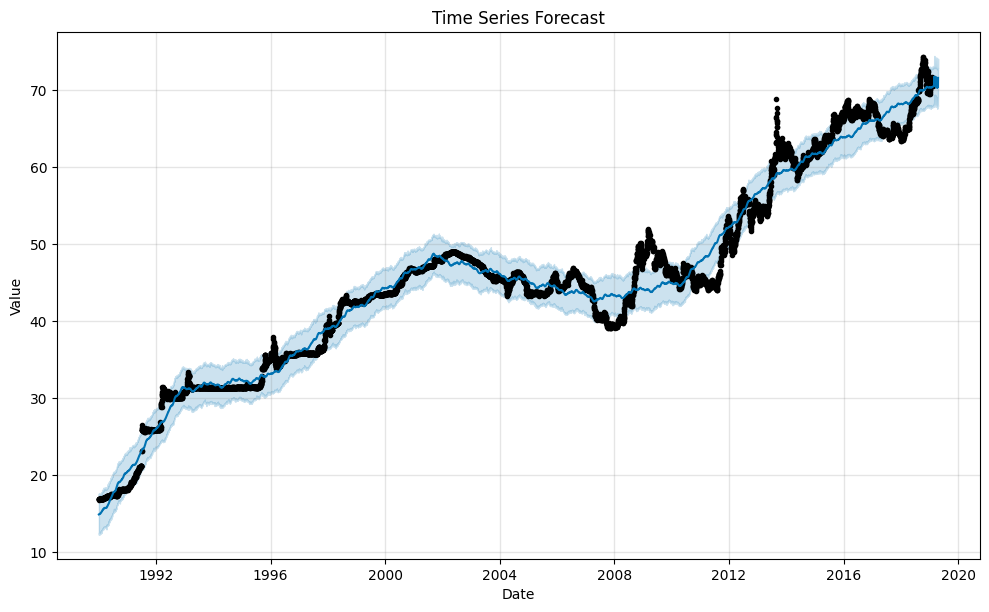

In [ ]:
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("Time Series Forecast")
plt.show()

In [ ]:
# Calculate RMSE and MSE for train set
train_rmse = np.sqrt(mean_squared_error(train_actual, train_predicted))
train_mse = mean_squared_error(train_actual, train_predicted)

In [ ]:
# Calculate RMSE and MSE for test set
test_rmse = np.sqrt(mean_squared_error(test_actual, test_predicted))
test_mse = mean_squared_error(test_actual, test_predicted)

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(train_actual, train_predicted)))
print("The  MAE on the Train set is:\t{:0.3f}".format(mean_absolute_error(train_actual, train_predicted)))
print("The  RMSE on the Train set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(train_actual, train_predicted))))
print()
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(test_actual, test_predicted)))
print("The  MAE on the Test set is:\t{:0.3f}".format(mean_absolute_error(test_actual, test_predicted)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(np.sqrt(mean_squared_error(test_actual, test_predicted))))

The R2 score on the Train set is:	0.977
The  MAE on the Train set is:	1.475
The  RMSE on the Train set is:	1.954

The R2 score on the Test set is:	0.741
The  MAE on the Test set is:	1.709
The  RMSE on the Test set is:	1.982


In [ ]:
def future_rates(edate):
  last_date = test_data['ds'].iloc[-1]
  edate = pd.to_datetime(edate)
  nd = abs(edate - last_date)
  nd = nd.days
  prediction_date = last_date + pd.DateOffset(days = nd)
  future = pd.date_range(start = last_date + pd.DateOffset(days=1), end = prediction_date, freq = 'D')
  future = pd.DataFrame({'ds':future})
  print(future)
  forecast = model.predict(future)
  future_df=pd.DataFrame(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
  print(future_df)
  return forecast.yhat_upper.iloc[-1]

In [ ]:
predicted = future_rates('2023-5-30')
predicted

           ds
0  2023-05-20
1  2023-05-21
2  2023-05-22
3  2023-05-23
4  2023-05-24
5  2023-05-25
6  2023-05-26
7  2023-05-27
8  2023-05-28
9  2023-05-29
10 2023-05-30
           ds       yhat  yhat_lower  yhat_upper
0  2023-05-20  80.628858   78.087514   83.181605
1  2023-05-21  80.647687   78.164791   83.202865
2  2023-05-22  79.495128   76.919781   81.903122
3  2023-05-23  79.525412   77.044672   82.193233
4  2023-05-24  79.536023   76.992626   82.013282
5  2023-05-25  79.551328   76.857006   81.986608
6  2023-05-26  79.550349   77.019284   82.045197
7  2023-05-27  80.748955   78.234506   83.208416
8  2023-05-28  80.763117   78.250836   83.244537
9  2023-05-29  79.605387   77.126242   82.242759
10 2023-05-30  79.630115   77.193282   82.116753


82.11675299355576

In [ ]:
def show_graph(edate):
  edate=pd.to_datetime(edate)
  last_date=edate-pd.Timedelta(days=15)
  plot_df=test_data.loc[test_data['ds']>= last_date]
  future = pd.date_range(start = plot_df['ds'].iloc[-1] +pd.DateOffset(days=1), end = edate, freq = 'D')
  future = pd.DataFrame({'ds':future})
  forecast = model.predict(future)
  future_df=pd.DataFrame(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
  y_axis=plot_df['y']
  y_axis.append(future_df['yhat_upper'])
  x_axis=plot_df['ds']
  x_axis.append(future_df['ds'])
  plt.plot(x_axis,y_axis)
  plt.xticks(x_axis,rotation=90)
  plt.show()

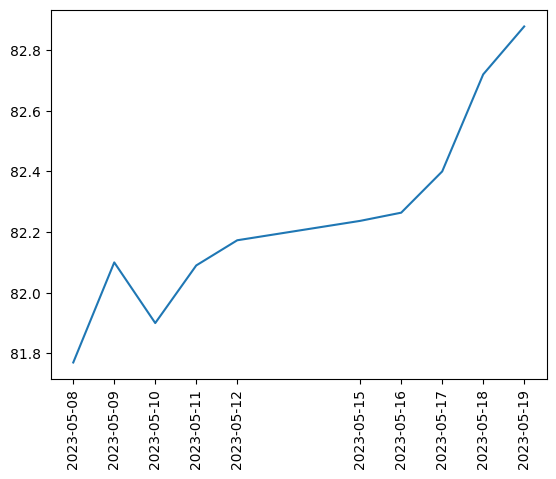

In [ ]:
show_graph('2023-05-21')

In [ ]:
test_data[:]

,ds,y,Open,High,Low,Change %
7594,2019-03-04,70.910,70.815,70.923,70.800,-0.13%
7595,2019-03-05,70.490,70.963,70.975,70.448,-0.59%
7596,2019-03-06,70.080,70.479,70.692,70.022,-0.58%
7597,2019-03-07,70.116,70.151,70.152,69.950,0.05%
7598,2019-03-08,70.012,70.111,70.245,69.827,-0.15%
...,...,...,...,...,...,...
8689,2023-05-15,82.237,82.244,82.388,82.182,0.08%
8690,2023-05-16,82.264,82.239,82.317,82.160,0.03%
8691,2023-05-17,82.400,82.272,82.460,82.260,0.17%
8692,2023-05-18,82.720,82.453,82.797,82.348,0.39%
